In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime

In [10]:
pip install yfinance


In [19]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-08-31'

# Fetch historical data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print(df.head())


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.487534  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.498751  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.395380  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.383556  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.425996  447610800


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-24,180.669998,181.100006,176.009995,176.380005,176.380005,54945800
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


In [21]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [22]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


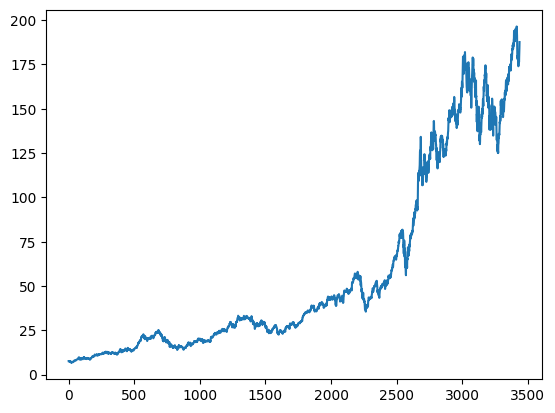

In [23]:
plt.plot(df.Close)

In [24]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3433,180.669998,181.100006,176.009995,176.380005,54945800
3434,177.380005,179.149994,175.820007,178.610001,51449600
3435,180.089996,180.589996,178.550003,180.190002,43820700
3436,179.699997,184.899994,179.500000,184.119995,53003900


In [25]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3433    178.982401
3434    179.106801
3435    179.252401
3436    179.456001
3437    179.685900
Name: Close, Length: 3438, dtype: float64

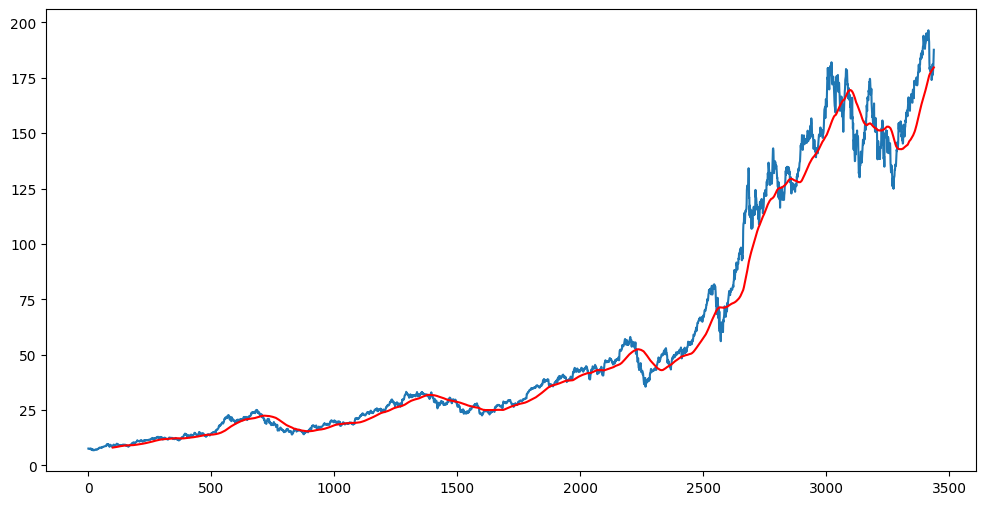

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [27]:
ma200 = df.Close.rolling(100).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3433    178.982401
3434    179.106801
3435    179.252401
3436    179.456001
3437    179.685900
Name: Close, Length: 3438, dtype: float64

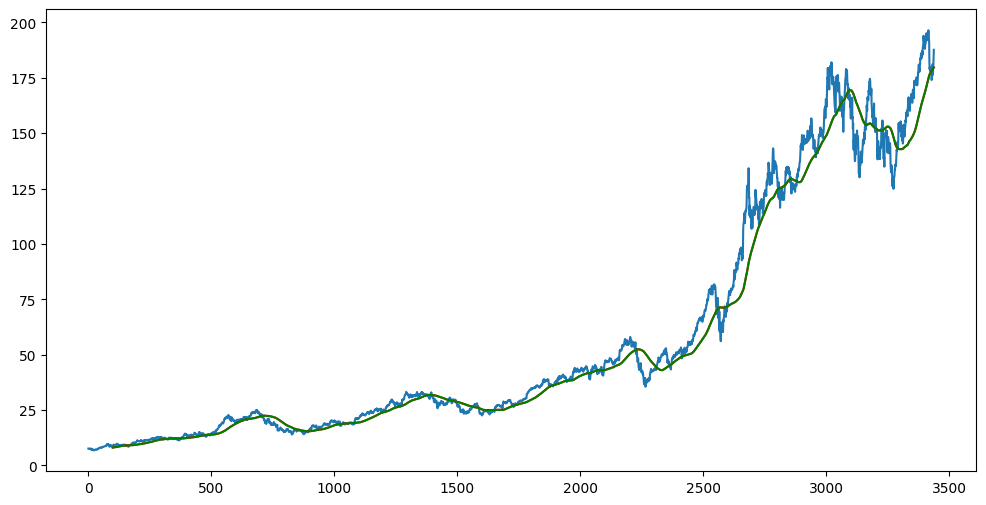

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [30]:
df.shape

(3438, 5)

In [32]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2406, 1)
(1032, 1)


In [33]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [34]:
data_testing.head()

,Close
2406,51.935001
2407,52.419998
2408,52.195000
2409,53.259998
2410,52.107498


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler(feature_range=(0,1))

In [37]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.88648036],
       [0.88564962],
       [0.87758648]])

In [38]:
data_training_array.shape

(2406, 1)

In [40]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [41]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 1))


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [47]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
73/73 [==============================] - 31s 318ms/step - loss: 0.0303
Epoch 2/50
73/73 [==============================] - 24s 328ms/step - loss: 0.0059
Epoch 3/50
73/73 [==============================] - 25s 343ms/step - loss: 0.0049
Epoch 4/50
73/73 [==============================] - 23s 310ms/step - loss: 0.0049
Epoch 5/50
73/73 [==============================] - 26s 360ms/step - loss: 0.0047
Epoch 6/50
73/73 [==============================] - 23s 314ms/step - loss: 0.0040
Epoch 7/50
73/73 [==============================] - 24s 331ms/step - loss: 0.0043
Epoch 8/50
73/73 [==============================] - 23s 318ms/step - loss: 0.0043
Epoch 9/50
73/73 [==============================] - 23s 320ms/step - loss: 0.0034
Epoch 10/50
73/73 [==============================] - 22s 304ms/step - loss: 0.0037
Epoch 11/50
73/73 [==============================] - 24s 328ms/step - loss: 0.0038
Epoch 12/50
73/73 [==============================] - 24s 334ms/step - loss: 0.0037
Epoch 13/50
7

In [50]:
model.save(r'C:\Users\Abhinay Reddy Perala\Dropbox\PC (2)\Downloads\keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
data_testing.head()

,Close
2406,51.935001
2407,52.419998
2408,52.195000
2409,53.259998
2410,52.107498


In [52]:
data_training.tail(100)

,Close
2306,43.882500
2307,43.630001
2308,43.125000
2309,43.227501
2310,44.724998
...,...
2401,50.647499
2402,51.805000
2403,52.209999
2404,52.167500


In [53]:
past_100_days = data_training.tail(100)

In [54]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-54-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [55]:
final_df.head()

,Close
0,43.882500
1,43.630001
2,43.125000
3,43.227501
4,44.724998


In [57]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00494048],
       [0.00329366],
       [0.        ],
       ...,
       [0.89395079],
       [0.91958257],
       [0.94260556]])

In [58]:
input_data.shape

(1132, 1)

In [59]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [60]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1032, 100, 1)
(1032,)


In [62]:
y_predicted = model.predict(x_test)

33/33 [==============================] - 5s 96ms/step


In [63]:
y_predicted.shape

(1032, 1)

In [64]:
y_test

array([0.05745965, 0.06062285, 0.05915539, ..., 0.89395079, 0.91958257,
       0.94260556])

In [65]:
y_predicted

array([[0.11836162],
       [0.11885935],
       [0.11936498],
       ...,
       [0.85546947],
       [0.8603884 ],
       [0.865888  ]], dtype=float32)

In [66]:
scaler.scale_

array([0.00652209])

In [67]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

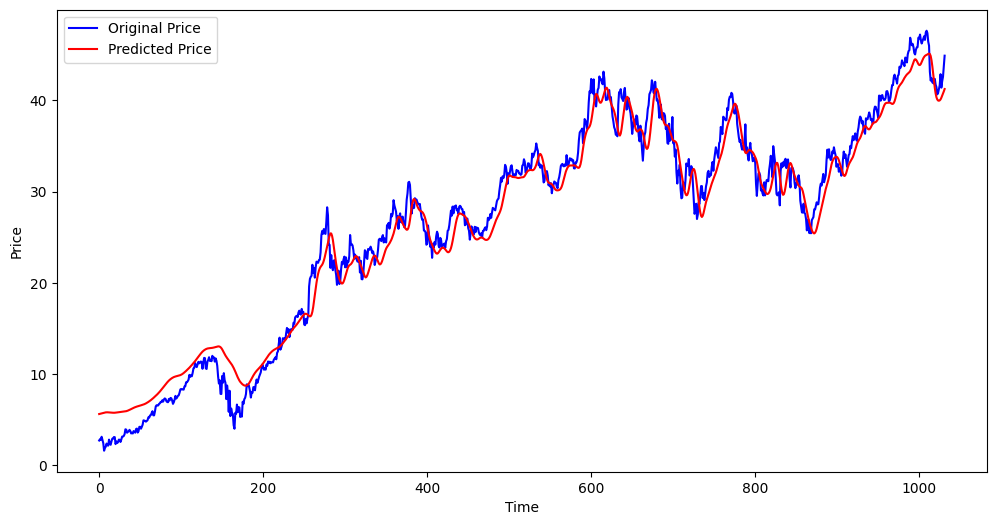

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()